In [1]:
import os
import glob
from google.colab import drive
drive.mount('/content/drive')
dataset_path = "/content/drive/My Drive/Machine Learning/ML Datasets/Amazon_review/amazon_product_reviews.csv"

Mounted at /content/drive


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Importing the required libraries

In [3]:
import time

# For loading data and data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# For cleaning the text
from nltk.corpus import stopwords
from nltk import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

# For data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# For preprocessing and modelling
import tensorflow as tf

# Loading the data

In [4]:
df = pd.read_csv(dataset_path)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


# Getting one with the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [7]:
df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [8]:
df.shape

(34660, 21)

# Taking the required columns

In [9]:
required_columns = ['reviews.text', 'reviews.rating']
df = df[required_columns]

df.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [10]:
df.rename(columns={'reviews.text': 'review', 'reviews.rating': 'rating'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df.head()

,review,rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [12]:
df.shape

(34660, 2)

 # Counting the number of characters in each review

In [13]:
df['char_count'] = df['review'].str.len().values

In [14]:
df.head()

,review,rating,char_count
0,This product so far has not disappointed. My c...,5.0,143.0
1,great for beginner or experienced person. Boug...,5.0,75.0
2,Inexpensive tablet for him to use and learn on...,5.0,131.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0,593.0
4,I bought this for my grand daughter when she c...,5.0,613.0


In [15]:
df.shape

(34660, 3)

# Function to plot the curve between number of records & given column

In [16]:
def plot_count(df, col, label):
    plt.figure(figsize=(12, 7))
    plt.plot(df[col], label=label)
    plt.legend()
    plt.xlabel('Number of review')
    plt.ylabel('Count')
    plt.show()

# Removing the outliers on the basis of number of characters

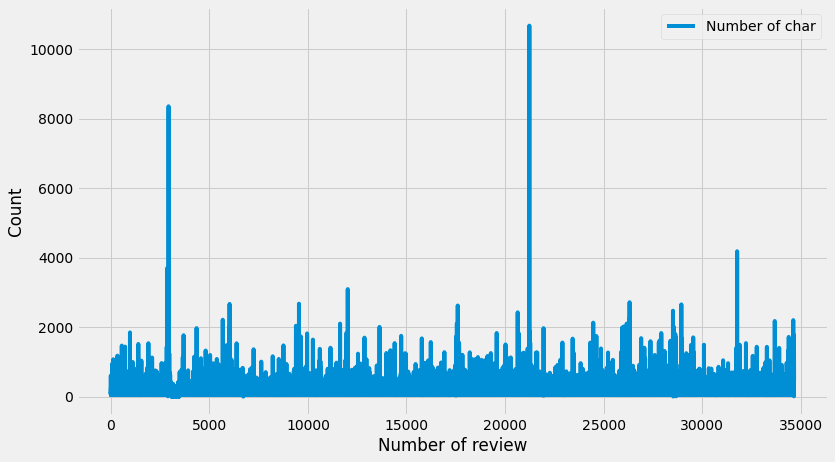

In [17]:
plot_count(df, 'char_count', 'Number of char')

### min, max and mean of the the char_count column

In [18]:
df['char_count'].min(), df['char_count'].max(), df['char_count'].mean()

(3.0, 10670.0, 159.04743356703887)

### Removing all the records that has more than 2000 characters

In [19]:
df = df[df['char_count'] <= 2000]

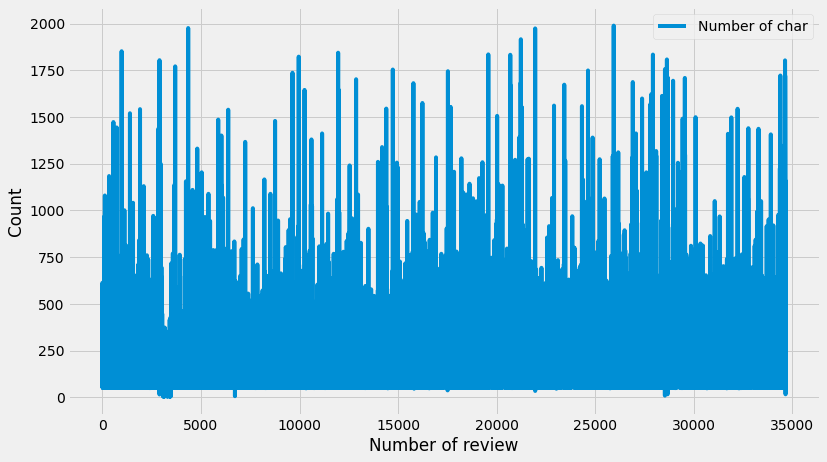

In [20]:
plot_count(df, 'char_count', 'Number of char')

In [21]:
df.shape

(34631, 3)

### Also removing all those records which has less than 50 characters

In [22]:
df = df[df['char_count'] > 50]

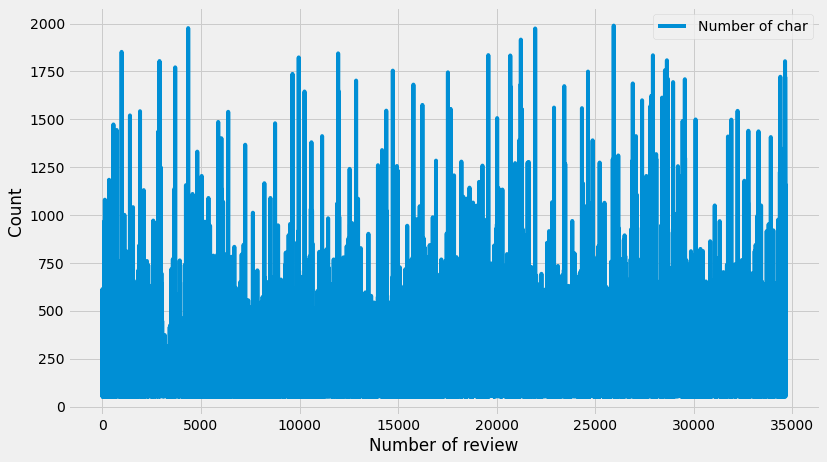

In [23]:
plot_count(df, 'char_count', 'Number of char')

In [24]:
df.shape

(33509, 3)

# Counting the number of words in each review

In [25]:
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

In [26]:
df.head()

,review,rating,char_count,word_count
0,This product so far has not disappointed. My c...,5.0,143.0,27
1,great for beginner or experienced person. Boug...,5.0,75.0,14
2,Inexpensive tablet for him to use and learn on...,5.0,131.0,26
3,I've had my Fire HD 8 two weeks now and I love...,4.0,593.0,117
4,I bought this for my grand daughter when she c...,5.0,613.0,117


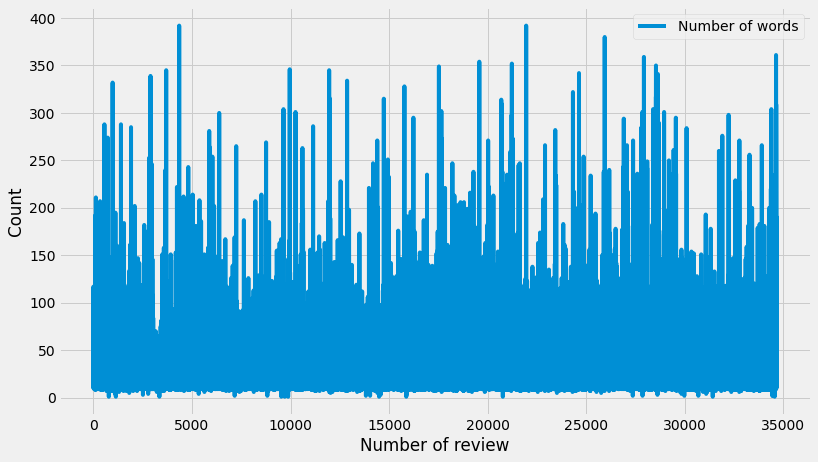

In [27]:
plot_count(df, 'word_count', 'Number of words')

# Making reviews greater than rating 4 as positive and less than 4 as negative

In [28]:
df['sentiment'] = df['rating'] >= 4.0

In [29]:
df.head()

,review,rating,char_count,word_count,sentiment
0,This product so far has not disappointed. My c...,5.0,143.0,27,True
1,great for beginner or experienced person. Boug...,5.0,75.0,14,True
2,Inexpensive tablet for him to use and learn on...,5.0,131.0,26,True
3,I've had my Fire HD 8 two weeks now and I love...,4.0,593.0,117,True
4,I bought this for my grand daughter when she c...,5.0,613.0,117,True


In [30]:
df['sentiment'] = df['sentiment'].replace([True, False], ['positive', 'negative'])

In [31]:
df.head()

,review,rating,char_count,word_count,sentiment
0,This product so far has not disappointed. My c...,5.0,143.0,27,positive
1,great for beginner or experienced person. Boug...,5.0,75.0,14,positive
2,Inexpensive tablet for him to use and learn on...,5.0,131.0,26,positive
3,I've had my Fire HD 8 two weeks now and I love...,4.0,593.0,117,positive
4,I bought this for my grand daughter when she c...,5.0,613.0,117,positive


In [32]:
df.shape

(33509, 5)

# Removing records which has null values

In [33]:
df.isnull().sum()

review         0
rating        31
char_count     0
word_count     0
sentiment      0
dtype: int64

In [34]:
df[df.isnull().any(axis=1)]

,review,rating,char_count,word_count,sentiment
2886,The Kindle is my first e-ink reader. I own an ...,NaN,1672.0,289,negative
2887,"I'm a first-time Kindle owner, so I have nothi...",NaN,1568.0,276,negative
2888,UPDATE NOVEMBER 2011:My review is now over a y...,NaN,1529.0,276,negative
2889,"I'm a first-time Kindle owner, so I have nothi...",NaN,1661.0,290,negative
2890,I woke up to a nice surprise this morning: a n...,NaN,1725.0,310,negative
2891,The Kindle is my first e-ink reader. I own an ...,NaN,1704.0,297,negative
2892,UPDATE NOVEMBER 2011:br /br /My review is now ...,NaN,1577.0,288,negative
2893,I woke up to a nice surprise this morning: a n...,NaN,1741.0,314,negative
2894,I use to hate to read but now that I have my K...,NaN,147.0,35,negative
2895,All of them quit working. There's absolutely n...,NaN,210.0,40,negative


In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(33478, 5)

# Cleaning the reviews

In [37]:
tokenizer = RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()

In [38]:
def cleaning(row):
    row = row.lower()
    words = tokenizer.tokenize(row)
    words = [lemmatizer.lemmatize(word.strip()) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [39]:
%%time
df['clean_review'] = df['review'].apply(cleaning)

CPU times: user 2min 16s, sys: 16.9 s, total: 2min 33s
Wall time: 2min 32s


In [40]:
df.head()

,review,rating,char_count,word_count,sentiment,clean_review
0,This product so far has not disappointed. My c...,5.0,143.0,27,positive,product far disappointed child love use like a...
1,great for beginner or experienced person. Boug...,5.0,75.0,14,positive,great beginner experienced person bought gift ...
2,Inexpensive tablet for him to use and learn on...,5.0,131.0,26,positive,inexpensive tablet use learn step nabi thrille...
3,I've had my Fire HD 8 two weeks now and I love...,4.0,593.0,117,positive,fire hd 8 two week love tablet great value pri...
4,I bought this for my grand daughter when she c...,5.0,613.0,117,positive,bought grand daughter come visit set user ente...


# Encode the labels using Label Encoder

In [41]:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [42]:
# 1 means positive and 0 means negative
df.head()

,review,rating,char_count,word_count,sentiment,clean_review
0,This product so far has not disappointed. My c...,5.0,143.0,27,1,product far disappointed child love use like a...
1,great for beginner or experienced person. Boug...,5.0,75.0,14,1,great beginner experienced person bought gift ...
2,Inexpensive tablet for him to use and learn on...,5.0,131.0,26,1,inexpensive tablet use learn step nabi thrille...
3,I've had my Fire HD 8 two weeks now and I love...,4.0,593.0,117,1,fire hd 8 two week love tablet great value pri...
4,I bought this for my grand daughter when she c...,5.0,613.0,117,1,bought grand daughter come visit set user ente...


# Word count of clean review

In [43]:
df['clean_word_count'] = df['clean_review'].apply(lambda x: len(x.split()))

In [44]:
df.head()

,review,rating,char_count,word_count,sentiment,clean_review,clean_word_count
0,This product so far has not disappointed. My c...,5.0,143.0,27,1,product far disappointed child love use like a...,13
1,great for beginner or experienced person. Boug...,5.0,75.0,14,1,great beginner experienced person bought gift ...,7
2,Inexpensive tablet for him to use and learn on...,5.0,131.0,26,1,inexpensive tablet use learn step nabi thrille...,10
3,I've had my Fire HD 8 two weeks now and I love...,4.0,593.0,117,1,fire hd 8 two week love tablet great value pri...,61
4,I bought this for my grand daughter when she c...,5.0,613.0,117,1,bought grand daughter come visit set user ente...,52


In [45]:
df = df[df['clean_word_count'] > 1]

In [46]:
df.shape

(33466, 7)

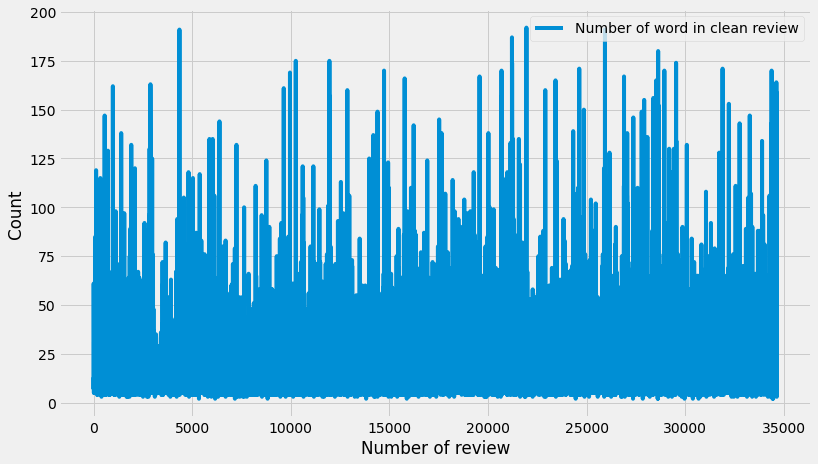

In [47]:
plot_count(df, 'clean_word_count', 'Number of word in clean review')

# Use padding to make the size of all reviews same

In [48]:
tf_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=500, split=' ')
tf_tokenizer.fit_on_texts(df['clean_review'].values)

In [49]:
X = tf_tokenizer.texts_to_sequences(df['clean_review'].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [50]:
X

array([[  0,   0,   0, ..., 230, 185, 324],
       [  0,   0,   0, ...,   9,  36,   3],
       [  0,   0,   0, ..., 337, 337, 227],
       ...,
       [  0,   0,   0, ..., 163,  13, 282],
       [  0,   0,   0, ..., 366,  40,   6],
       [  0,   0,   0, ..., 107,  35,   8]], dtype=int32)

In [51]:
X.shape

(33466, 140)

# Splitting data into train and test

In [52]:
y = pd.get_dummies(df['sentiment'])

In [63]:
y.head()

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23426, 140), (10040, 140), (23426, 2), (10040, 2))

# Creating Sequential model and train it

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(500, 120, input_length=X.shape[1]),
    tf.keras.layers.SpatialDropout1D(0.4),
    tf.keras.layers.LSTM(176, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 120)          60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 140, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(X_train, y_train, epochs=10, batch_size=1024, verbose='auto')

Epoch 1/10
23/23 [==============================] - 25s 840ms/step - loss: 0.3508 - accuracy: 0.9039
Epoch 2/10
23/23 [==============================] - 19s 847ms/step - loss: 0.2455 - accuracy: 0.9308
Epoch 3/10
23/23 [==============================] - 19s 835ms/step - loss: 0.2257 - accuracy: 0.9311
Epoch 4/10
23/23 [==============================] - 19s 825ms/step - loss: 0.1982 - accuracy: 0.9346
Epoch 5/10
23/23 [==============================] - 20s 852ms/step - loss: 0.1825 - accuracy: 0.9369
Epoch 6/10
23/23 [==============================] - 19s 837ms/step - loss: 0.1770 - accuracy: 0.9390
Epoch 7/10
23/23 [==============================] - 20s 849ms/step - loss: 0.1756 - accuracy: 0.9389
Epoch 8/10
23/23 [==============================] - 19s 829ms/step - loss: 0.1721 - accuracy: 0.9409
Epoch 9/10
23/23 [==============================] - 19s 841ms/step - loss: 0.1701 - accuracy: 0.9409
Epoch 10/10
23/23 [==============================] - 20s 849ms/step - loss: 0.1677 - accura

### Plot the history

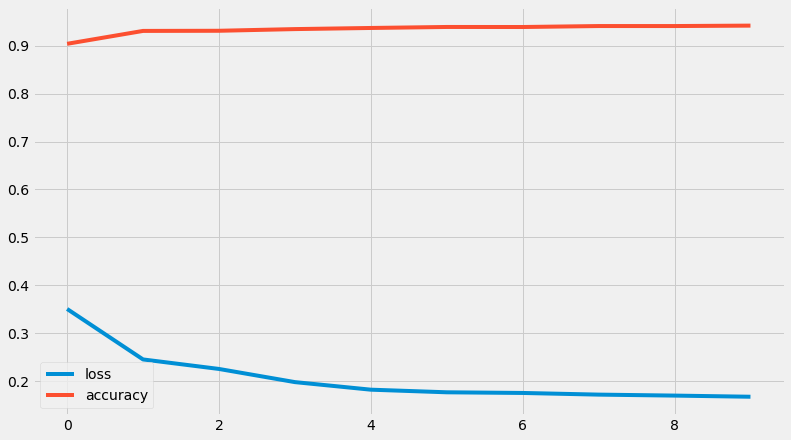

In [57]:
pd.DataFrame(history.history).plot(figsize=(12,7))

In [58]:
model.evaluate(X_test, y_test)

314/314 [==============================] - 19s 60ms/step - loss: 0.1783 - accuracy: 0.9386


[0.17832918465137482, 0.9386454224586487]

# Pipeline to predict the sentiment of the raw review

In [65]:
def pipeline(model, review):
    df_pipe = pd.DataFrame({'review': [review]})
    df_pipe['clean_review'] = df_pipe['review'].apply(cleaning)
    X = tf_tokenizer.texts_to_sequences(df_pipe['clean_review'].values)
    X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=140)

    return model.predict(X)

In [66]:
pipeline(model, 'Product is bad')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0  15 396]]


array([[0.34079626, 0.6592037 ]], dtype=float32)